In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [3]:
# Loading the dataset.
df = pd.read_csv(r'C:\CodSoft_Projects\archive\Churn_Modelling.csv')


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Dropping columns that are not useful for the model
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Assuming there are missing values, we'll impute them.
# For numerical columns, we use mean; for categorical,we use mode.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Exited')

# Creating transformers for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the transformer
X = df.drop('Exited', axis=1)
y = df['Exited']
X_processed = preprocessor.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [14]:
# Basic Descriptive Statistics
print(df.describe())

# Distribution of the target variable 'Exited'
print(df['Exited'].value_counts())


        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

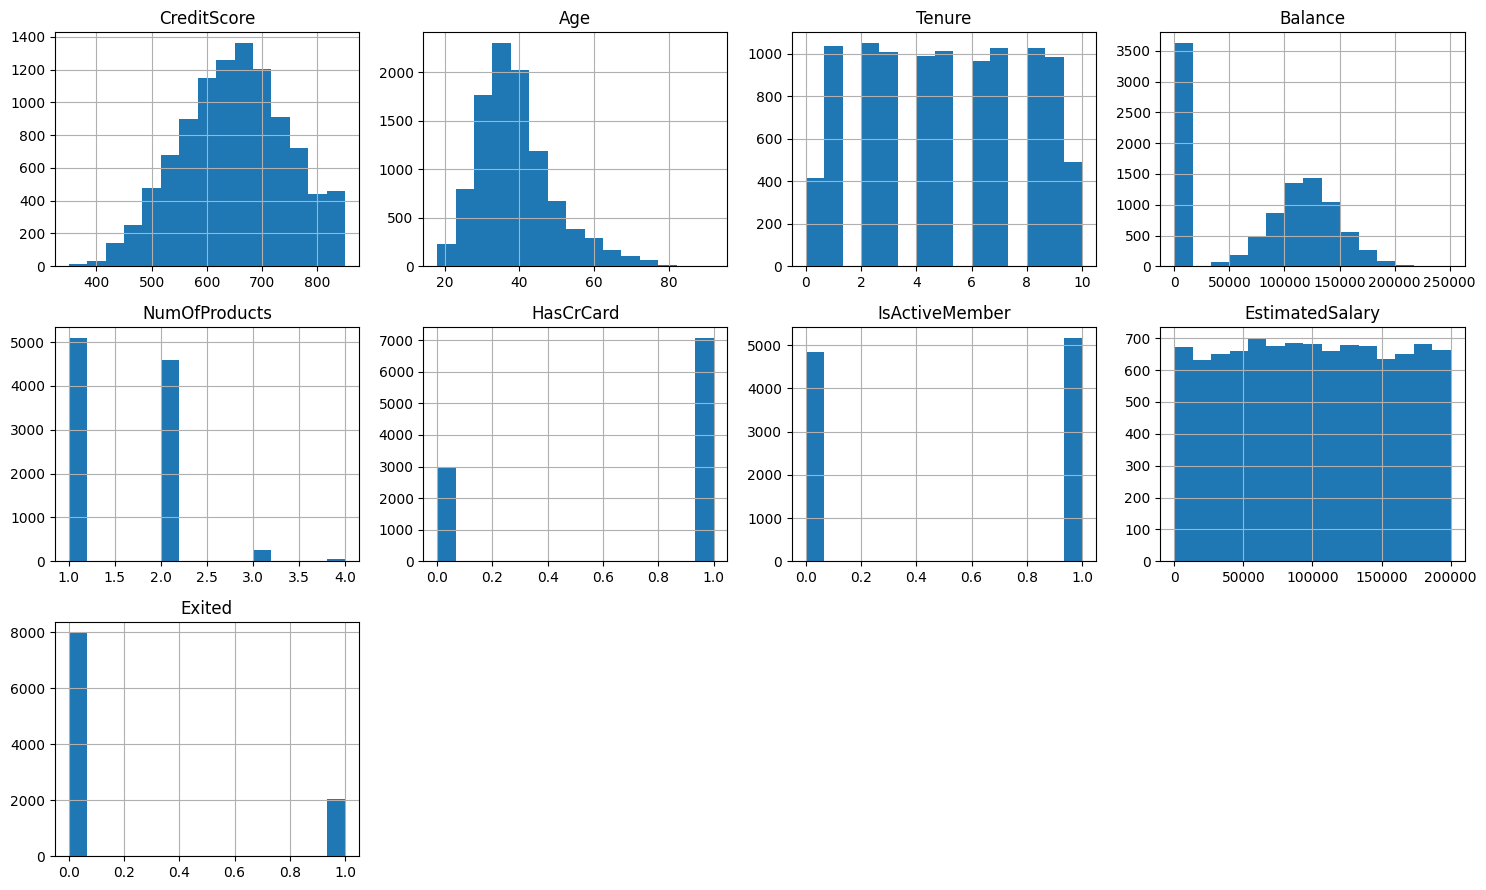

In [16]:
import math

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplot grid
num_cols = len(numerical_cols)
nrows = int(math.ceil(num_cols / 4))  # Adjust the denominator to change the number of columns per row

# Plotting histograms
df[numerical_cols].hist(bins=15, figsize=(15, nrows * 3), layout=(nrows, 4))
plt.tight_layout()
plt.show()



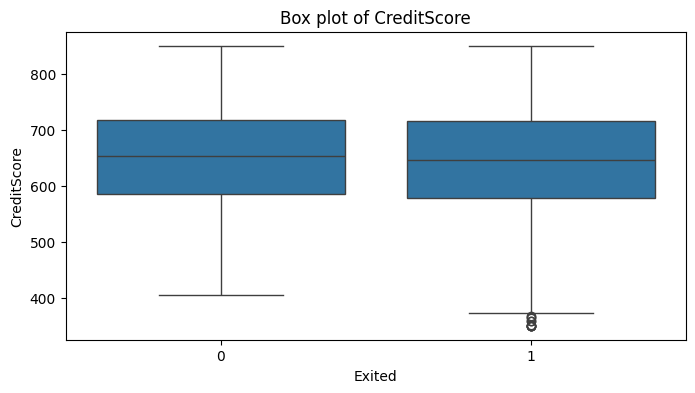

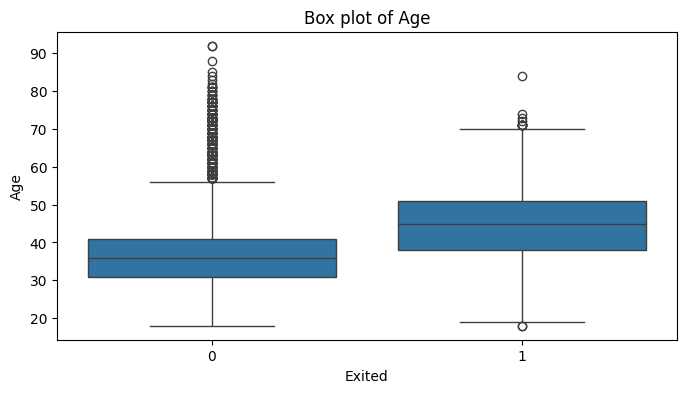

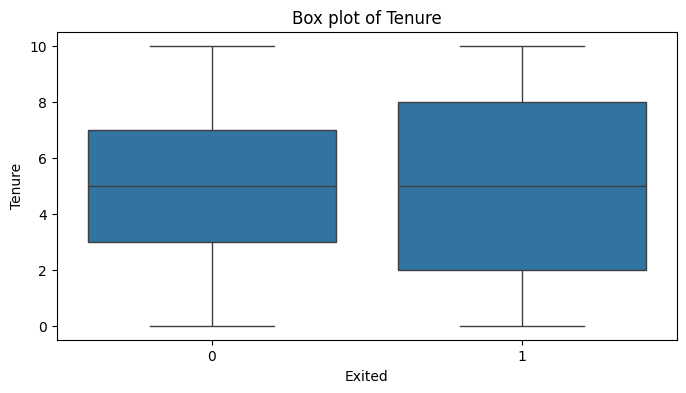

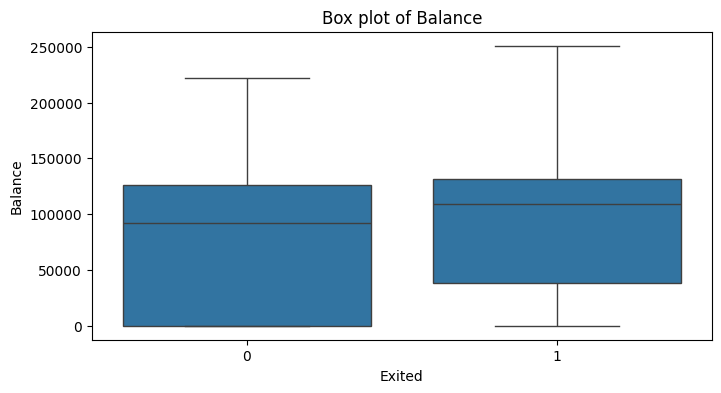

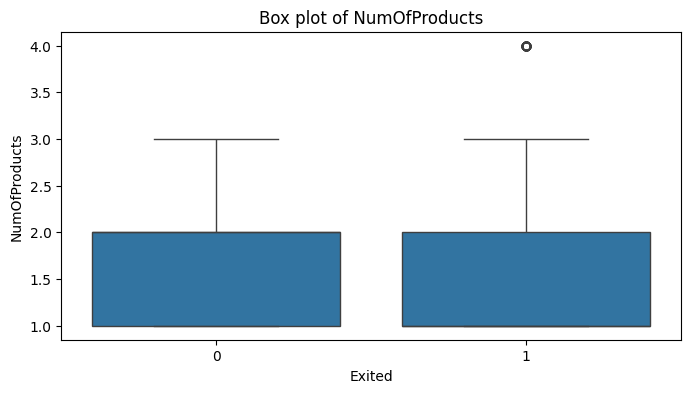

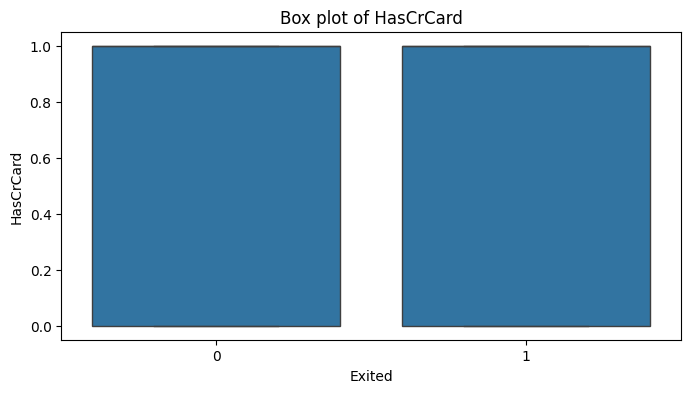

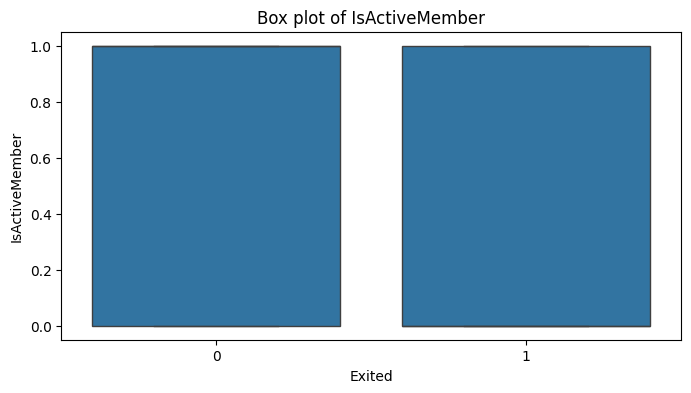

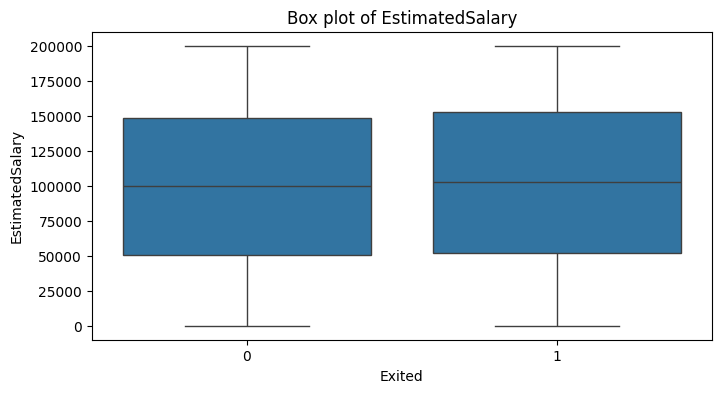

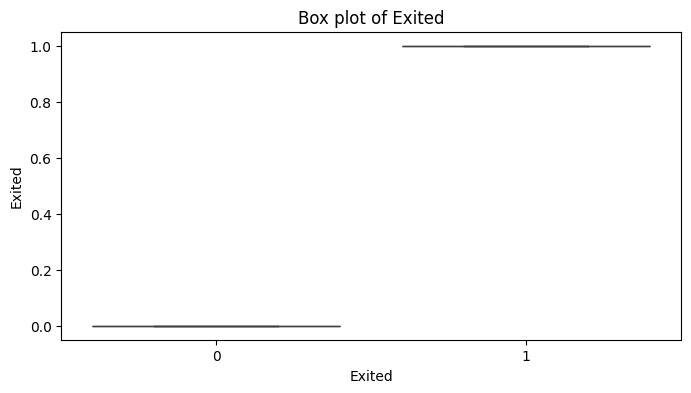

In [17]:
# Box plots to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'Box plot of {col}')
    plt.show()


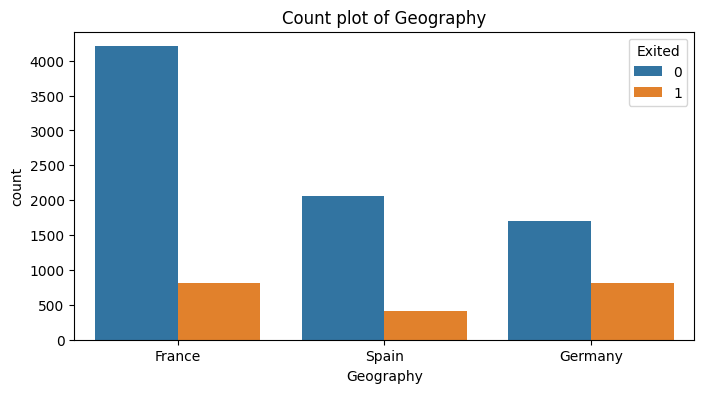

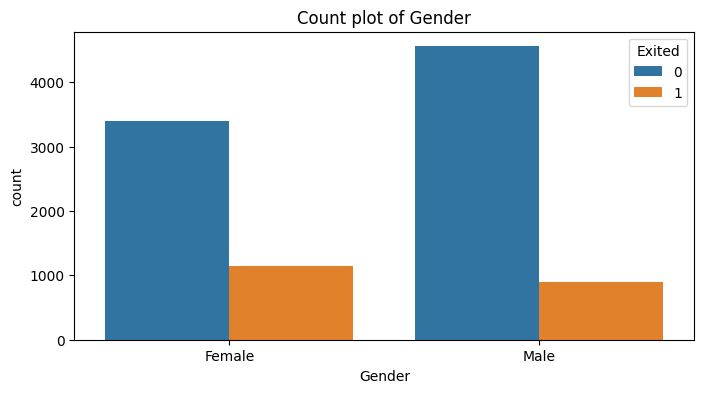

In [18]:
# Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plotting count plots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Count plot of {col}')
    plt.show()


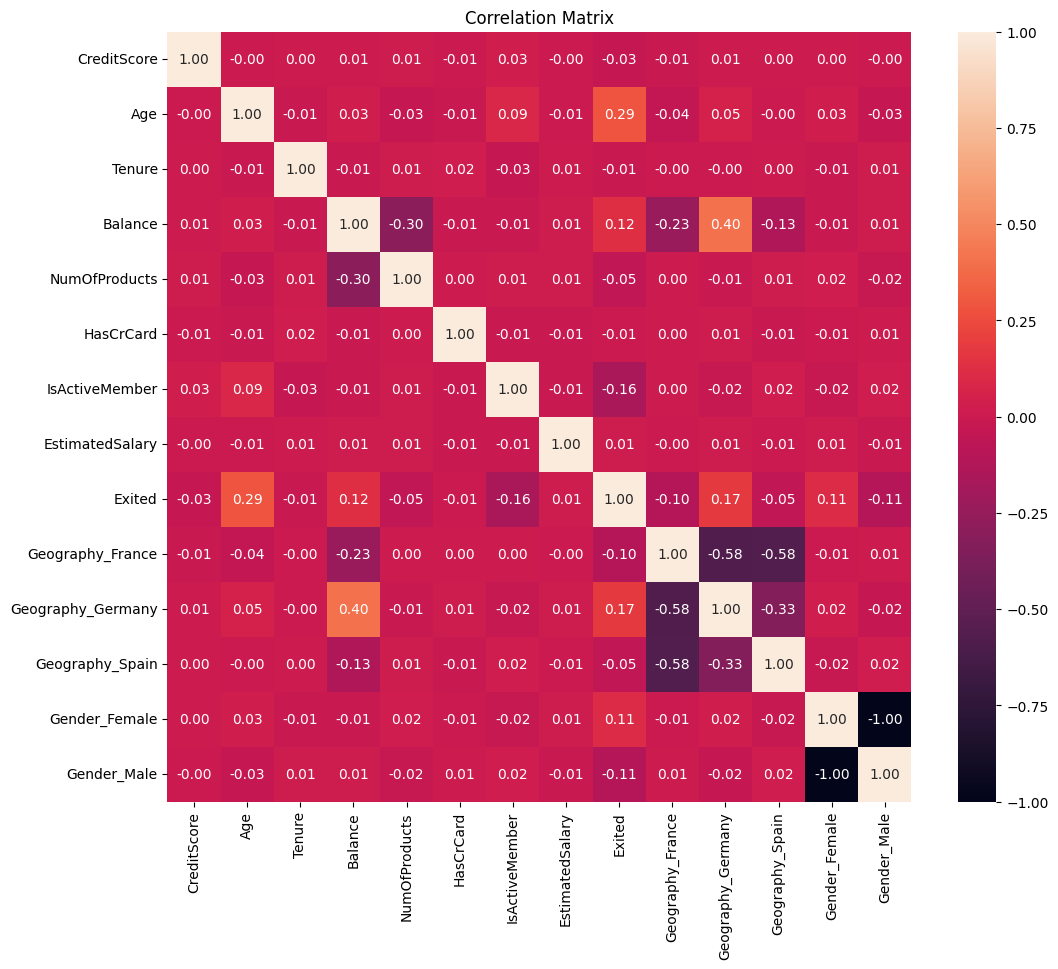

In [20]:


# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Now df_encoded has only numeric columns, suitable for correlation analysis
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [21]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))



Exited
0    0.7945
1    0.2055
Name: proportion, dtype: float64
Exited
0    0.8035
1    0.1965
Name: proportion, dtype: float64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [23]:
# Baseline Model: Predicting the most frequent class
baseline_pred = [y_train.mode()[0]] * len(y_test)

# Evaluating the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_pred)
print(f"Baseline Model Accuracy: {baseline_accuracy:.2f}")


Baseline Model Accuracy: 0.80


In [26]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_pred = log_reg.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")


Logistic Regression Accuracy: 0.81


In [27]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_pred = random_forest.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.86


In [28]:
# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
gb_pred = gradient_boosting.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Accuracy: 0.86


In [32]:
# Hyperparameter Tuning with Grid Search
# Logistic Regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Gradient Boosting
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best Score for Logistic Regression:", grid_log_reg.best_score_)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Score for Random Forest:", grid_rf.best_score_)
print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best Score for Gradient Boosting:", grid_gb.best_score_)

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'}
Best Score for Logistic Regression: 0.8106250000000002
Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best Score for Random Forest: 0.8641249999999999
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score for Gradient Boosting: 0.8630000000000001


In [33]:
# For each model, Using Cross-Validation and then choosing one. 

# Cross-Validation for the best Logistic Regression model
log_reg_best = LogisticRegression(**grid_log_reg.best_params_, random_state=42)
log_reg_cv_score = cross_val_score(log_reg_best, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Logistic Regression:", log_reg_cv_score)
print("Mean CV Score for Logistic Regression:", np.mean(log_reg_cv_score))

# Cross-Validation for the best Random Forest model
rf_best = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf_cv_score = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", rf_cv_score)
print("Mean CV Score for Random Forest:", np.mean(rf_cv_score))

# Cross-Validation for the best Gradient Boosting model
gb_best = GradientBoostingClassifier(**grid_gb.best_params_, random_state=42)
gb_cv_score = cross_val_score(gb_best, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Gradient Boosting:", gb_cv_score)
print("Mean CV Score for Gradient Boosting:", np.mean(gb_cv_score))


Cross-Validation Scores for Logistic Regression: [0.805    0.795    0.8175   0.81375  0.821875]
Mean CV Score for Logistic Regression: 0.8106250000000002
Cross-Validation Scores for Random Forest: [0.870625 0.86375  0.865625 0.86     0.860625]
Mean CV Score for Random Forest: 0.8641249999999999
Cross-Validation Scores for Gradient Boosting: [0.8725   0.854375 0.864375 0.86375  0.86    ]
Mean CV Score for Gradient Boosting: 0.8630000000000001


In [34]:
"""
After Hyper-Tuning and Cross-Validation:

after hyperparameter tuning and cross-validation:

Logistic Regression
Best Parameters: Regularization strength C at 0.1 and solver as 'newton-cg'.
Best Grid Search Score: 0.8106 (approx).
Cross-Validation Scores: Ranging from 0.795 to 0.821875 with a mean of 0.8106.
Analysis: The model shows consistent performance across the cross-validation folds, 
indicating good generalization. 
However, its performance is slightly lower compared to the other two models.


Random Forest
Best Parameters: max_depth at 30, min_samples_split at 10, and n_estimators (number of trees) at 100.
Best Grid Search Score: 0.8641 (approx).
Cross-Validation Scores: Ranging from 0.86 to 0.870625 with a mean of 0.8641.
Analysis: Random Forest shows the highest mean cross-validation score 
among the three models, indicating a strong performance. 
The model also demonstrates consistency across different folds, 
suggesting it is not overfitting and generalizes well.


Gradient Boosting
Best Parameters: learning_rate at 0.1, max_depth at 3, and n_estimators at 100.
Best Grid Search Score: 0.8630 (approx).
Cross-Validation Scores: Ranging from 0.854375 to 0.8725 with a mean of 0.8630.
Analysis: Gradient Boosting performs comparably to Random Forest, 
with a slightly lower mean score. 
It shows a bit more variation in the cross-validation scores 
but still indicates robust performance.


Overall Comparison

Performance: Random Forest slightly out-performsn Gradient Boosting and Logistic Regression 
in terms of the mean cross-validation score.

Consistency: All models show good consistency in cross-validation scores, 
but Random Forest has a slight edge in terms of both performance and consistency.

Model Selection: If the choice is based solely on accuracy, Random Forest would be the preferred model. 
However, it's important to consider other factors like model interpretability, 
computational efficiency, and how the model will be used in practice.

Final Evaluation: The chosen model (Random Forest, based on these results) 
should be finally evaluated on the test set to estimate its real-world performance.


"""

"\nAfter Hyper-Tuning and Cross-Validation:\n\nafter hyperparameter tuning and cross-validation:\n\nLogistic Regression\nBest Parameters: Regularization strength C at 0.1 and solver as 'newton-cg'.\nBest Grid Search Score: 0.8106 (approx).\nCross-Validation Scores: Ranging from 0.795 to 0.821875 with a mean of 0.8106.\nAnalysis: The model shows consistent performance across the cross-validation folds, \nindicating good generalization. \nHowever, its performance is slightly lower compared to the other two models.\n\n\nRandom Forest\nBest Parameters: max_depth at 30, min_samples_split at 10, and n_estimators (number of trees) at 100.\nBest Grid Search Score: 0.8641 (approx).\nCross-Validation Scores: Ranging from 0.86 to 0.870625 with a mean of 0.8641.\nAnalysis: Random Forest shows the highest mean cross-validation score \namong the three models, indicating a strong performance. \nThe model also demonstrates consistency across different folds, \nsuggesting it is not overfitting and gene

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


Accuracy: 0.8655

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Confusion Matrix:



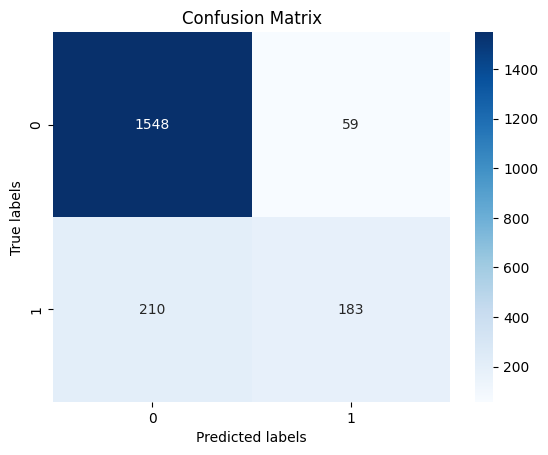

ROC-AUC Score: 0.8644


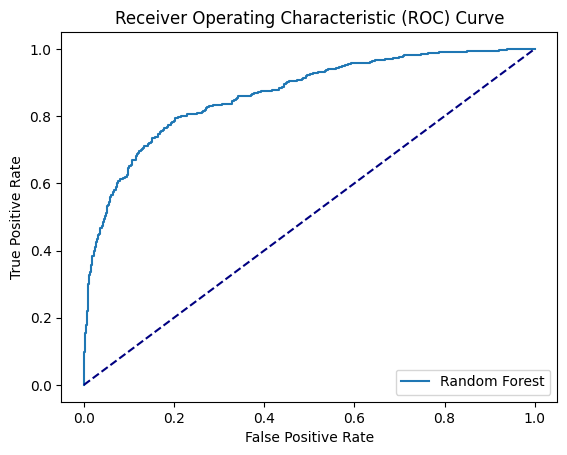

In [36]:
# Initialize the Random Forest model with the best parameters
final_model = RandomForestClassifier(**grid_rf.best_params_, random_state=42)

# Train the model on the entire training set
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
"""

Accuracy
Accuracy: 0.8655 (or 86.55%)
This is a strong overall accuracy, 
indicating that the model correctly predicts customer churn in approximately 86.55% of cases.


Classification Analysis

Class 0 (Non-Churned Customers)

Precision: 0.88 - When the model predicts a customer will not churn, 
it is correct 88% of the time.

Recall: 0.96 - The model successfully identifies 96% of all non-churning customers.

F1-Score: 0.92 - A high F1-score for non-churned customers indicates 
a good balance between precision and recall.


Class 1 (Churned Customers)

Precision: 0.76 - When the model predicts a customer will churn, 
it is correct 76% of the time.

Recall: 0.47 - The model identifies 47% of all actual churning customers.

F1-Score: 0.58 - This F1-score is considerably lower than that for non-churned customers, 
suggesting that the model is less effective at correctly identifying churned customers.

Overall Interpretation

The model performs very well in identifying non-churned customers 
but is less effective at correctly identifying churned customers. 
This is evident from the high recall and F1-score for non-churned customers 
and the relatively lower recall and F1-score for churned customers.

The lower recall for churned customers (47%) indicates that 
more than half of the actual churned customers are being missed by the model. 
This could be a significant issue depending on the business context. 
For instance, if the cost of missing out on identifying a churned customer is high, 
this model might need further improvement, especially in improving recall for churned customers.
The precision for churned customers is reasonably good, 
meaning that when the model predicts churn, 
it is likely to be correct. 
However, the challenge is that it's not identifying enough of these churned customers.

"""

"\n\nAccuracy\nAccuracy: 0.8655 (or 86.55%)\nThis is a strong overall accuracy, \nindicating that the model correctly predicts customer churn in approximately 86.55% of cases.\n\n\nClassification Analysis\n\nClass 0 (Non-Churned Customers)\n\nPrecision: 0.88 - When the model predicts a customer will not churn, \nit is correct 88% of the time.\n\nRecall: 0.96 - The model successfully identifies 96% of all non-churning customers.\n\nF1-Score: 0.92 - A high F1-score for non-churned customers indicates \na good balance between precision and recall.\n\n\nClass 1 (Churned Customers)\n\nPrecision: 0.76 - When the model predicts a customer will churn, \nit is correct 76% of the time.\n\nRecall: 0.47 - The model identifies 47% of all actual churning customers.\n\nF1-Score: 0.58 - This F1-score is considerably lower than that for non-churned customers, \nsuggesting that the model is less effective at correctly identifying churned customers.\n\nOverall Interpretation\n\nThe model performs very we

In [38]:
# Save the Model to prevent re-training
import joblib

# Save the model to a file
joblib.dump(final_model, 'random_forest_churn_model.joblib')


['random_forest_churn_model.joblib']

In [39]:
def get_user_input():
    # Create an empty dictionary to store user input
    user_input = {}

    # List of features the model expects
    features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

    # Prompt user for each feature
    for feature in features:
        # For numerical inputs, convert the input to the correct type
        if feature in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']:
            user_input[feature] = float(input(f"Enter {feature}: "))
        else:  # For categorical inputs, keep as string
            user_input[feature] = input(f"Enter {feature}: ")

    return user_input


In [40]:
def predict_churn():
    # Load the saved model
    model = joblib.load('random_forest_churn_model.joblib')

    # Get user input
    user_input = get_user_input()

    # Convert user input into DataFrame
    input_df = pd.DataFrame([user_input])

    # Process the input using the same preprocessing as the training data
    input_processed = preprocessor.transform(input_df)

    # Make a prediction
    prediction = model.predict(input_processed)

    # Return the prediction
    return "Churn" if prediction[0] == 1 else "No Churn"


In [41]:
# Making a sample prediction based on user input
prediction = predict_churn()
print(prediction)

No Churn


In [42]:
"""
This result No Churn is based on the sample data, 

CreditScore: 650 
Geography: 'France' 
Gender: 'Male' 
Age: 40 
Tenure: 3 
Balance: 60000 
NumOfProducts: 2 
HasCrCard: 1 
IsActiveMember: 1 

"""

"\nThis result No Churn is based on the sample data, \n\nCreditScore: 650 \nGeography: 'France' \nGender: 'Male' \nAge: 40 \nTenure: 3 \nBalance: 60000 \nNumOfProducts: 2 \nHasCrCard: 1 \nIsActiveMember: 1 \n\n"